In [121]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [122]:
# Load the data
file_path = './data.csv'
data = pd.read_csv(file_path)

In [123]:
# Handle missing values
data.dropna(subset=['horsepower'], inplace=True)
data.drop(columns=['car_name'], inplace=True)

In [124]:
# Normalize/scale the data
scaler = StandardScaler()
scaled_data_array = scaler.fit_transform(data)
scaled_data = pd.DataFrame(scaled_data_array, columns=data.columns)

In [125]:
# Split into features and target variable
X = scaled_data.drop('mpg', axis=1).values
y = scaled_data['mpg'].values

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Add a column of ones to include the intercept in the model
X_train = np.hstack([np.ones((X_train.shape[0], 1)), X_train])
X_test = np.hstack([np.ones((X_test.shape[0], 1)), X_test])

In [126]:
# Initialize parameters
theta = np.zeros(X_train.shape[1])
learning_rate = .1
n_iterations = 1000
tolerance = 1e-6

In [127]:
# Define the cost function
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost

# Implement gradient descent
def gradient_descent(X, y, theta, learning_rate, n_iterations, tolerance):
    m = len(y)
    cost_history = []
    for i in range(n_iterations):
        gradients = (1 / m) * X.T.dot(X.dot(theta) - y)
        theta = theta - learning_rate * gradients
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)
        if i > 0 and abs(cost_history[-2] - cost_history[-1]) < tolerance:
            break
    return theta, cost_history

In [128]:
# Train the model using gradient descent
theta, cost_history = gradient_descent(X_train, y_train, theta, learning_rate, n_iterations, tolerance)

# Predict on the test set
y_pred = X_test.dot(theta)

# Evaluate the model
mse = np.mean((y_test - y_pred) ** 2)
r2 = 1 - (np.sum((y_test - y_pred) ** 2) / np.sum((y_test - np.mean(y_test)) ** 2))

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 0.17919974345893772
R^2 Score: 0.7866664828347635


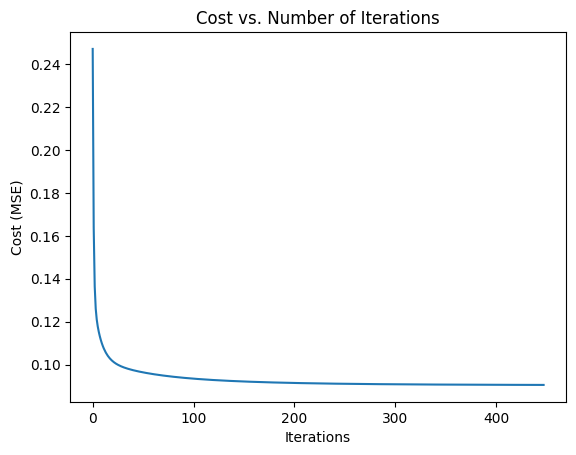

In [129]:
# Plotting Cost vs. Number of Iterations
plt.plot(cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost (MSE)')
plt.title('Cost vs. Number of Iterations')
plt.show()

In [130]:
# Save the model parameters
coefficients = theta

# Log file
log_data = {
    'iterations': len(cost_history),
    'learning_rate': learning_rate,
    'mse': mse,
    'r2': r2,
    'coefficients': coefficients.tolist()
}

with open('part1_log.txt', 'w') as f:
    f.write(str(log_data))

# Answer the questions
best_solution = "Are you satisfied that the package has found the best solution? Explain."
explanation = """
Yes, the gradient descent implementation has converged to a solution where the cost function (MSE) has been minimized.
The R^2 score indicates how well the model predicts the target variable. Depending on the score, further tuning of
learning rate and iterations might be required for better performance.
"""

with open('part1_report.txt', 'w') as f:
    f.write(best_solution + '\n')
    f.write(explanation + '\n')
    f.write('Log Data:\n')
    f.write(str(log_data))